In [1]:
# import my library
import pandas as pd
import numpy as np
import network_analysis as net
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats
import random
import umap.umap_ as umap
%matplotlib inline


/home/ryansenne/anaconda3/envs/Networks2/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ryansenne/anaconda3/envs/Networks2/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ryansenne/anaconda3/envs/Networks2/lib/python3.10/si

In [2]:
from pathlib import Path
path = Path("/home/ryansenne/PycharmProjects/Networks2/csv_files")

my_allen_colors = net.get_allen_colors(path / "ROIs.csv")

In [3]:
# set some filepaths for network creation
chr2_of = path / 'ChR2_Large_Box.csv'
control_of = path / 'Control_Large_Box.csv'
chr2_small =  path / 'ChR2_Small_Box.csv'
control_small = path /'Control_Small_Box.csv'
innate_recall =  path / 'innate_recall.csv'

In [16]:
chr2_large_analysis = net.NetworkAnalysis(chr2_of)
chr2_large_analysis.create_network(threshold=0.05)

control_large_analysis = net.NetworkAnalysis(control_of)
control_large_analysis.create_network(threshold=0.05)

chr2_small_analysis = net.NetworkAnalysis(chr2_small)
chr2_small_analysis.create_network(threshold=0.05)

control_small_analysis = net.NetworkAnalysis(control_small)
chr2_large_analysis.create_network(threshold=0.05)

ir_analysis = net.NetworkAnalysis(innate_recall)
ir_analysis.create_network(threshold=0.05)


In [17]:
len(control_large_analysis.G.edges())

445

100%|██████████| 1000/1000 [02:39<00:00,  6.26it/s]


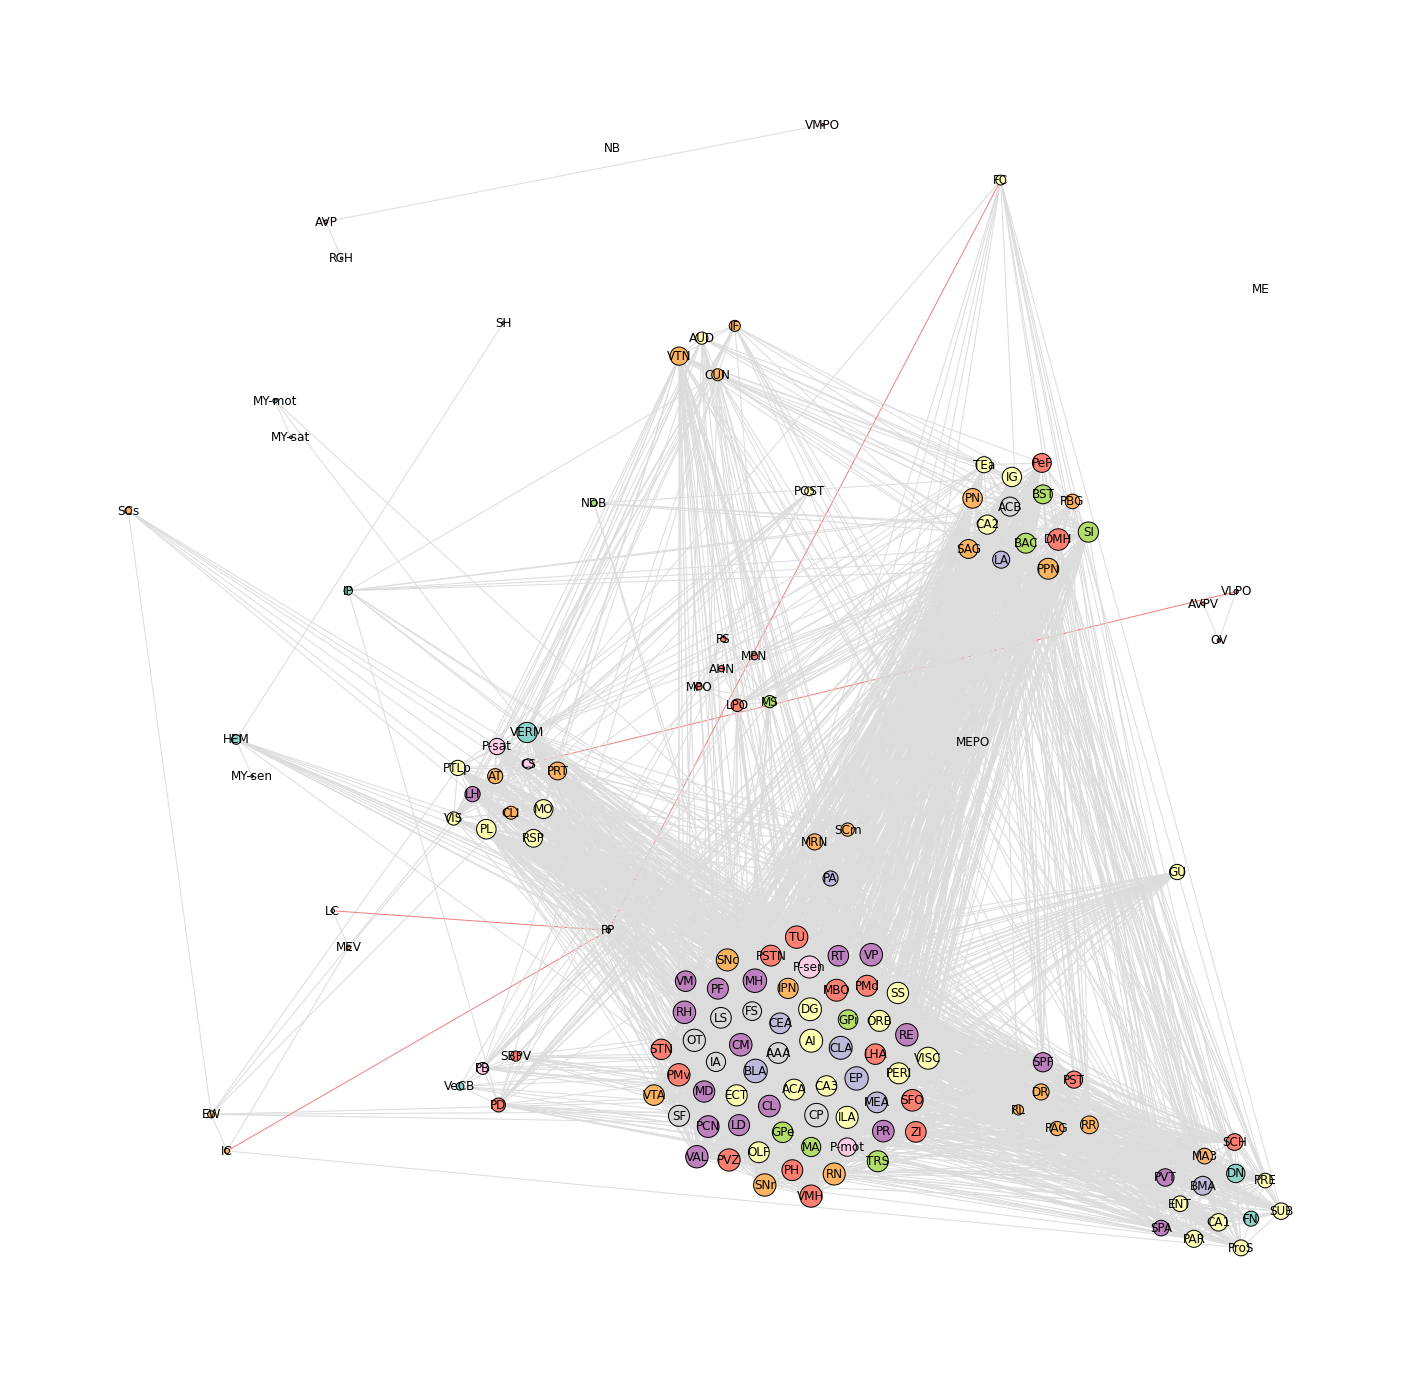

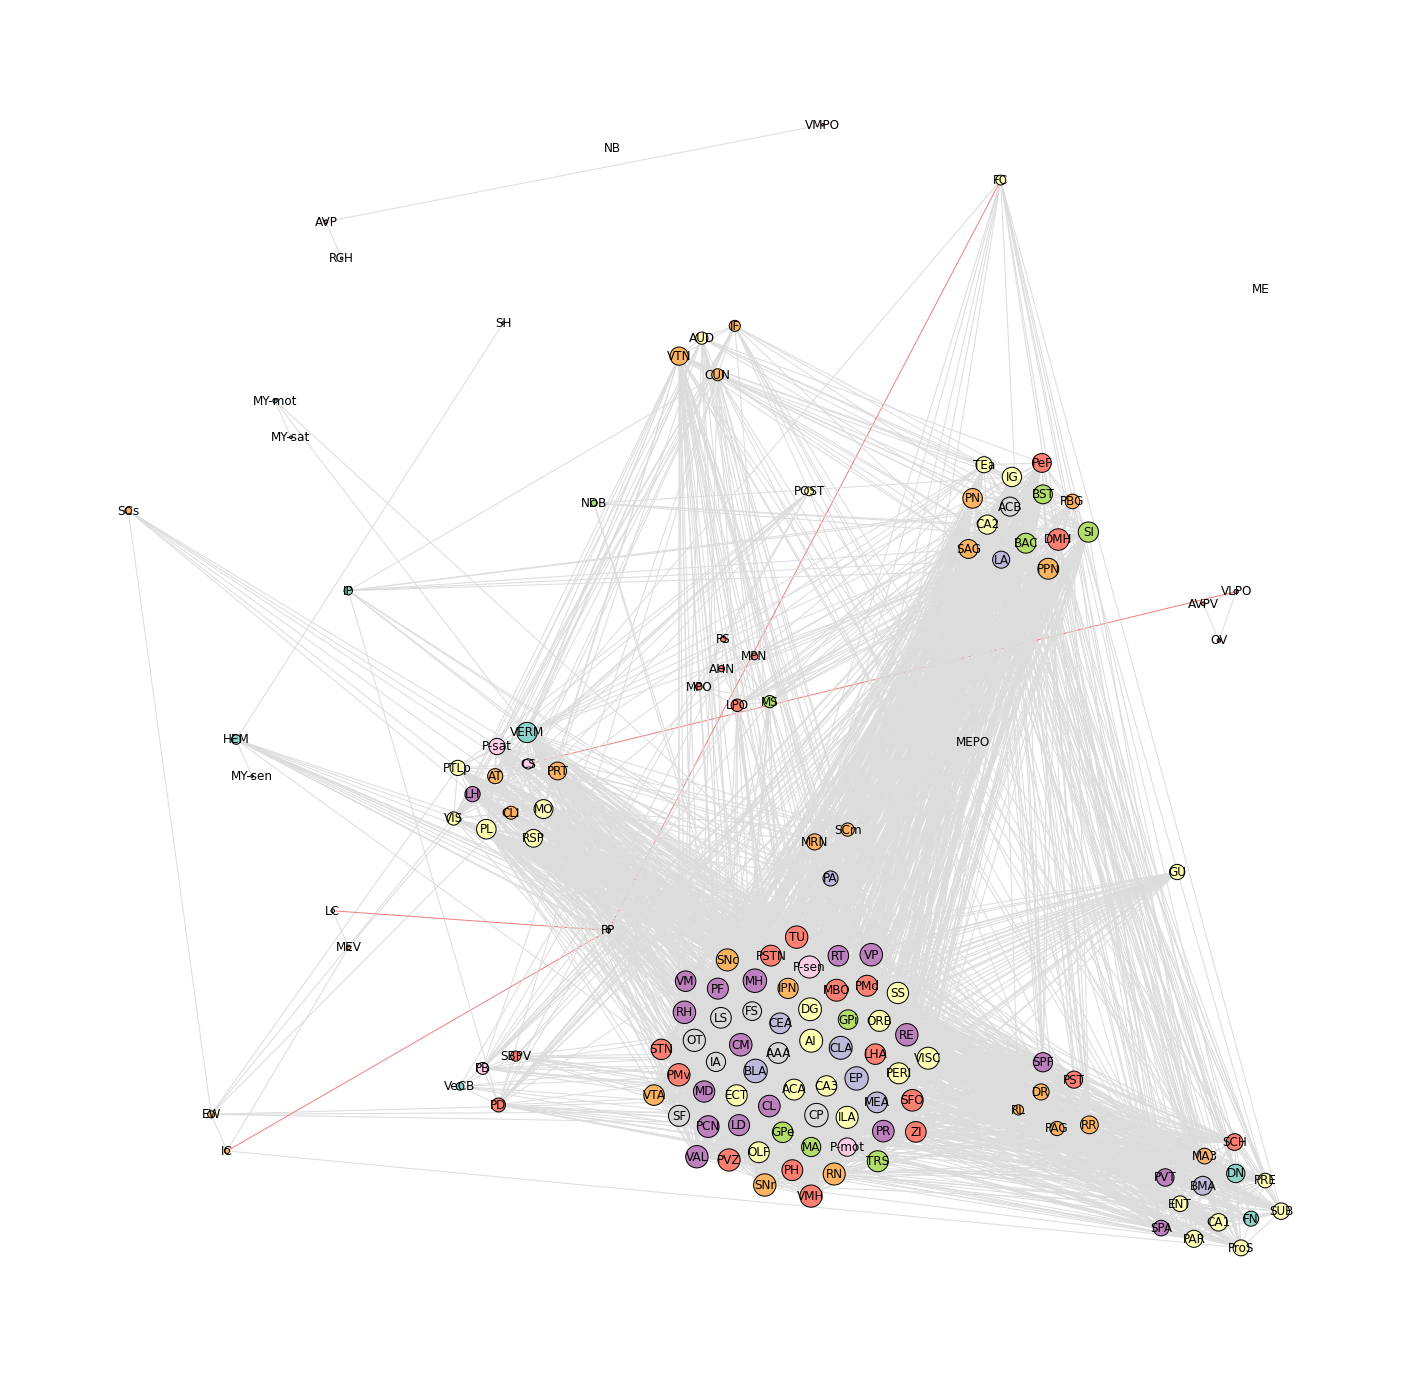

In [12]:
network = chr2_large_analysis
a, b, c = network.leiden_algorithm()
pos_dict = net.get_position_data(b, network.nodes, False)
net.graph_network(network.G, my_allen_colors, pos_dict)

/tmp/ipykernel_160975/428297664.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(degree_sequence1), marker='o', linestyle='')


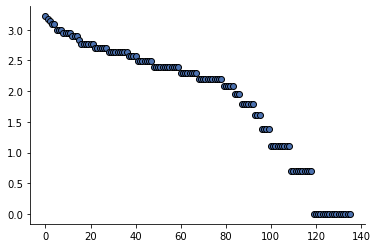

In [20]:
degree_sequence1 = sorted([d for n, d in chr2_large_analysis.G.degree()], reverse=True)
plt.plot(np.log(degree_sequence1), marker='o', linestyle='')

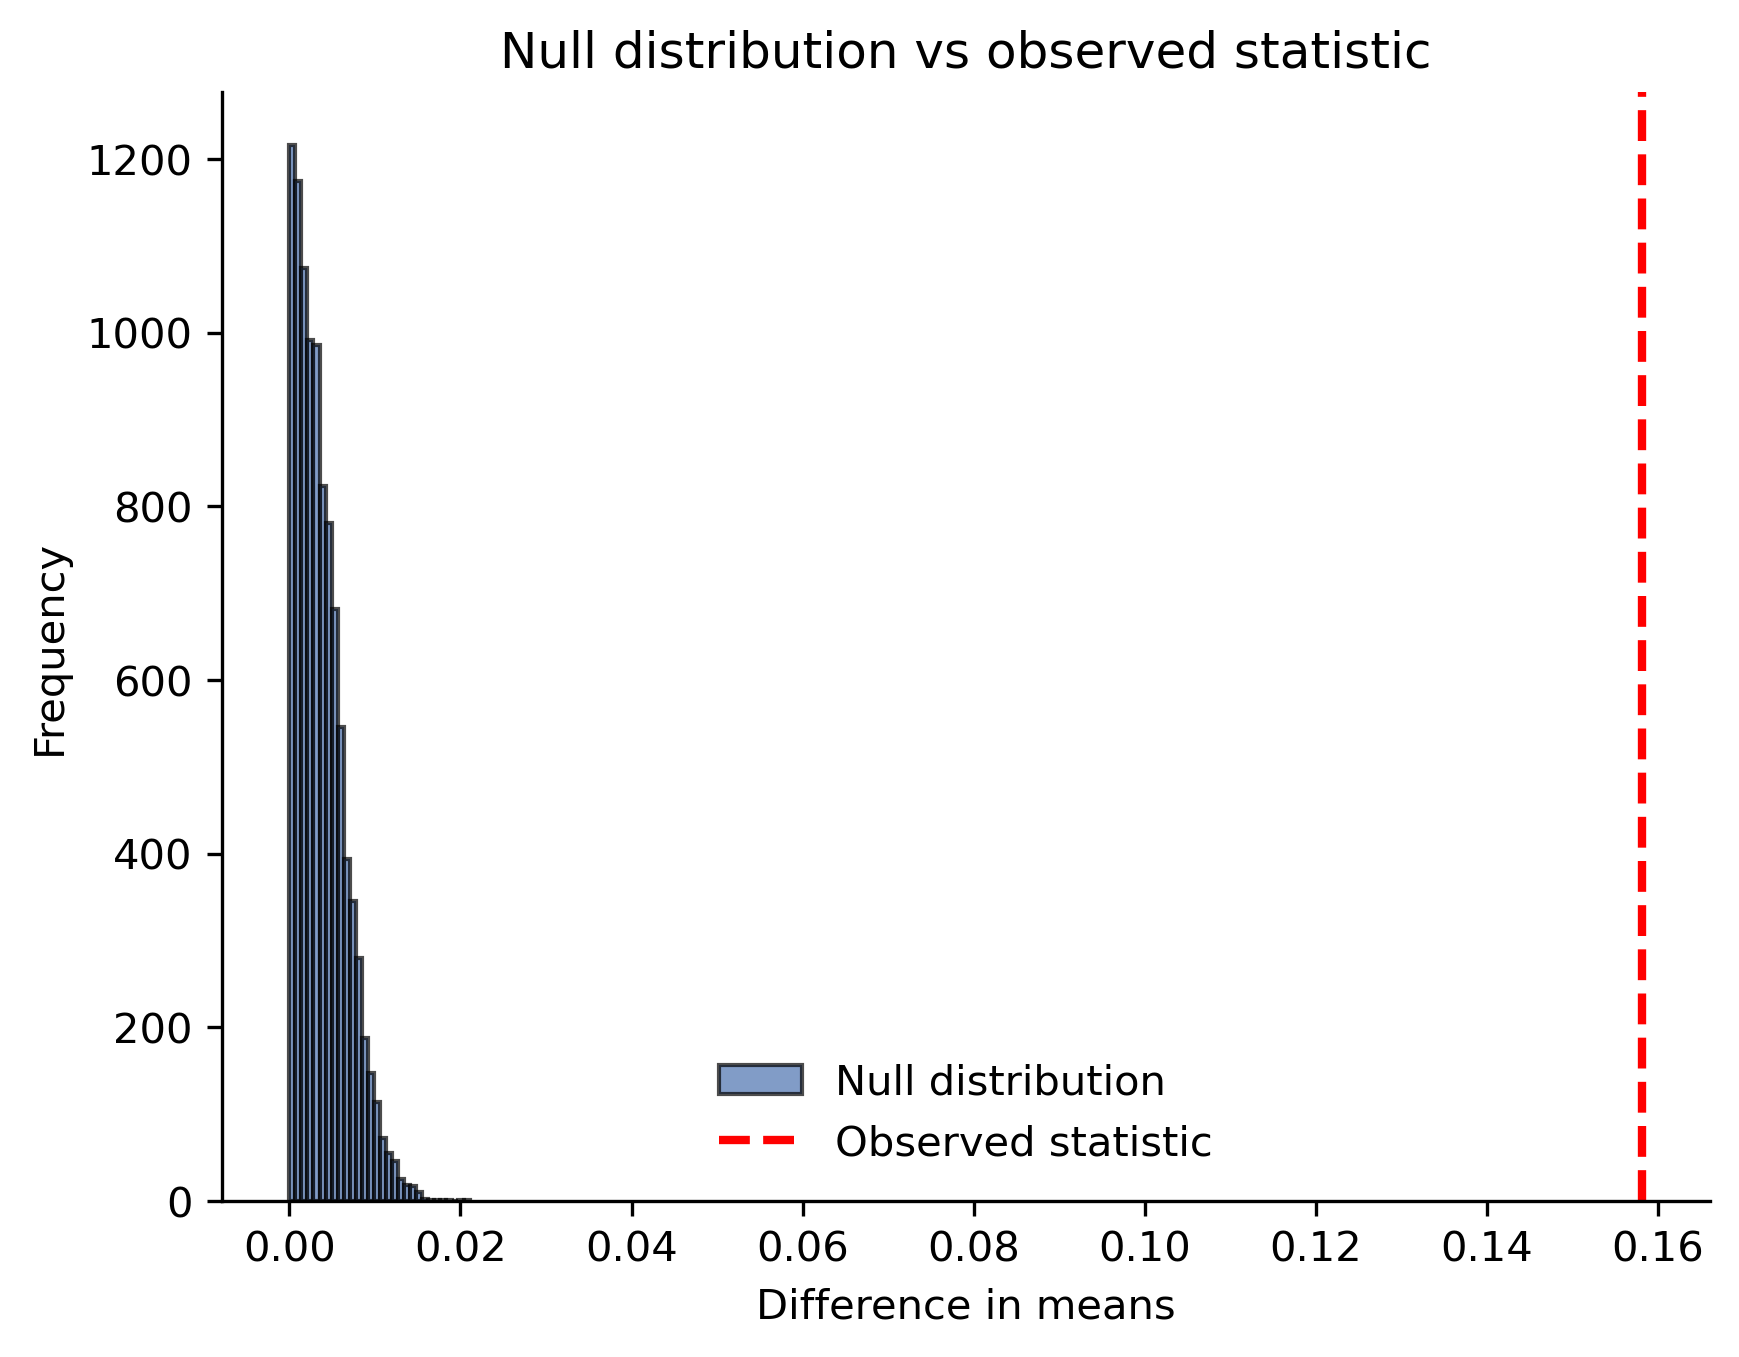

(0.15817851109245767, 0.0)

In [15]:
# net.corr_permutation_ttest(rvals1_small, control_rvals_small, niters=10000, plot=True)